##Импорт библиотек

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import plotly.express as px

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, BatchNormalization, Input, concatenate
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.utils import img_to_array
from PIL import Image
import seaborn as sns
from tensorflow.keras.losses import MeanAbsoluteError
import math

###Функция сплита на выборки

In [ ]:
def train_val_test_split(input_data, output_data, train_split, val_split, test_split):
  train_slice = int(train_split*100)
  val_slice = train_slice+int(val_split*100)
  test_slice = val_slice+int(test_split*100)

  train_data_list = list()
  val_data_list = list()
  test_data_list = list()

  train_output_list = list()
  val_output_list = list()
  test_output_list = list()

  for arr in input_data:
    train_data_list.append(arr[:,:train_slice,:,:,:])
    val_data_list.append(arr[:,train_slice:val_slice,:,:,:])
    test_data_list.append(arr[:,val_slice:test_slice,:,:,:])

  for euler in output_data:
    train_output_list.append([euler]*int(train_split*100))
    val_output_list.append([euler]*int(val_split*100))
    test_output_list.append([euler]*int(test_split*100))

  train_data = np.hstack(tuple(train_data_list))
  val_data = np.hstack(tuple(val_data_list))
  test_data = np.hstack(tuple(test_data_list))

  train_output = np.vstack(tuple(train_output_list))
  val_output = np.vstack(tuple(val_output_list))
  test_output = np.vstack(tuple(test_output_list))

  return train_data, train_output, val_data, val_output, test_data, test_output

###Функция перевода изображений в numpy array

In [ ]:
def image_files_to_array(dir):
  arr = list()
  for i in range(100):
    img = Image.open(dir+'/'+str(i+1)+'.png').convert('RGB')
    arr.append(img_to_array(img))
  return np.asarray(arr) / 255

####Перевод из 4х-мерных в 2х-мерные с сохранением

In [ ]:
def from_4dim_to_2dim(input_data, output_data, names):
  directory = '/content/drive/MyDrive/работа с картинками/Дневник_колаб/input_data/для 2х изображений/'
  i = 0
  for arr in input_data:
    new_arr = np.stack((arr[0], arr[2]))
    np.save(directory+names[i]+'.npy', new_arr)
    i += 1
  directory = '/content/drive/MyDrive/работа с картинками/Дневник_колаб/output_data/для 2х изображений/'
  i = 0
  for arr in output_data:
    np.save(directory+names[i]+'.npy', arr)
    i += 1

##Подготовка данных для демонстрации

###Функция перевода numpy array в dataframe

In [ ]:
def array_to_dataframe(array):
  mean_R, mean_G, mean_B, std_R, std_G, std_B, median_R, median_G, median_B = ([] for i in range(9))
  for i in range(100):
    mean_R.append(np.mean(array[i,:,:,0]))
    mean_G.append(np.mean(array[i,:,:,1]))
    mean_B.append(np.mean(array[i,:,:,2]))
    std_R.append(np.std(array[i,:,:,0]))
    std_G.append(np.std(array[i,:,:,1]))
    std_B.append(np.std(array[i,:,:,2]))
    median_R.append(np.median(array[i,:,:,0]))
    median_G.append(np.median(array[i,:,:,1]))
    median_B.append(np.median(array[i,:,:,2]))
  data = np.vstack((mean_R, mean_G, mean_B, std_R, std_G, std_B, median_R, median_G, median_B))
  df = pd.DataFrame(data = data.T, columns = ['mean_R', 'mean_G', 'mean_B', 'std_R', 'std_G', 'std_B', 'median_R', 'median_G', 'median_B'])
  return df

###Построение плотности распределения RGB гистограммы

In [ ]:
def array_to_rgb_hist(array, name):
  plt.figure(figsize=(100, 100))
  for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.axis([0, 1, 0, 20])
    sns.distplot(array[i,:,:,:].ravel(), kde = True, hist = False, color = 'black')
    sns.distplot(array[i,:,:,0].ravel(), kde = True, hist = False, color = 'red')
    sns.distplot(array[i,:,:,1].ravel(), kde = True, hist = False, color = 'green')
    sns.distplot(array[i,:,:,2].ravel(), kde = True, hist = False, color = 'blue')
    plt.ylabel('изображение '+str(i+1))
    plt.xlabel(name)
    plt.legend(['Total','Red', 'Green', 'Blue'])
  plt.show()

###Подсчет статистик о каждом изображении в DataFrame

In [ ]:
save_dir = '/content/drive/MyDrive/работа с картинками/Дневник_колаб/информация о 4х изображениях/'
for i in range(len(input_data)):
  for j in range(4):
    arr = input_data[i][j]
    df = array_to_dataframe(arr)
    df.to_excel(save_dir + names[i] + '____'+str(j)+'.xlsx')

In [ ]:
green3_df = array_to_dataframe(green3_arr)

In [ ]:
df_list = list()

###Загрузка таблиц excel

In [ ]:
save_dir = '/content/drive/MyDrive/работа с картинками/Дневник_колаб/results/'

In [ ]:
green1_df.to_excel(save_dir + green1_name + '.xlsx')

In [ ]:
for df in df_list():
  pass

###Подготовка данных для 3D графиков

In [ ]:
def arrs_on_3d(arrs, names):
  pass

In [ ]:
name_color_dict = {purple1_name:'purple', purple2_name:'mediumpurple', green1_name:'green', green2_name:'lightgreen', green3_name:'darkgreen', blue_name:'blue'}

In [ ]:
data = {'R': np.hstack((purple1_df['mean_R'].values, purple2_df['mean_R'].values, green1_df['mean_R'].values, green2_df['mean_R'].values, green3_df['mean_R'].values, blue_df['mean_R'].values)),
	'G': np.hstack((purple1_df['mean_G'].values, purple2_df['mean_G'].values, green1_df['mean_G'].values, green2_df['mean_G'].values, green3_df['mean_G'].values, blue_df['mean_G'].values)),
	'B': np.hstack((purple1_df['mean_B'].values, purple2_df['mean_B'].values, green1_df['mean_B'].values, green2_df['mean_B'].values, green3_df['mean_B'].values, blue_df['mean_B'].values)),
	'color': [purple1_name]*100+[purple2_name]*100+[green1_name]*100+[green2_name]*100+[green3_name]*100+[blue_name]*100}
df_for_3d = pd.DataFrame(data)

In [ ]:
name_inv_color_dict = {inv_purple1_name:'purple', inv_purple2_name:'mediumpurple', inv_green1_name:'green', inv_green2_name:'lightgreen', inv_green3_name:'darkgreen', inv_blue_name:'blue'}

In [ ]:
data = {'R': np.hstack((inv_purple1_df['mean_R'].values, inv_purple2_df['mean_R'].values, inv_green1_df['mean_R'].values, inv_green2_df['mean_R'].values, inv_green3_df['mean_R'].values, inv_blue_df['mean_R'].values)),
	'G': np.hstack((inv_purple1_df['mean_G'].values, inv_purple2_df['mean_G'].values, inv_green1_df['mean_G'].values, inv_green2_df['mean_G'].values, inv_green3_df['mean_G'].values, inv_blue_df['mean_G'].values)),
	'B': np.hstack((inv_purple1_df['mean_B'].values, inv_purple2_df['mean_B'].values, inv_green1_df['mean_B'].values, inv_green2_df['mean_B'].values, inv_green3_df['mean_B'].values, inv_blue_df['mean_B'].values)),
	'color': [inv_purple1_name]*100+[inv_purple2_name]*100+[inv_green1_name]*100+[inv_green2_name]*100+[inv_green3_name]*100+[inv_blue_name]*100}
df_inv_for_3d = pd.DataFrame(data)

##3D-графики

###Для прямых изображений

In [ ]:
fig = px.scatter_3d(df_for_3d, x='R', y='G', z='B', color='color', color_discrete_map=name_color_dict)
fig.show()

###Для обратных изображений

In [ ]:
fig = px.scatter_3d(df_inv_for_3d, x='R', y='G', z='B', color='color', color_discrete_map=name_inv_color_dict)
fig.show()

#Нейросеть для 2х изображений

##Подготовка данных и разбиение на выборки

In [ ]:
train_data, train_output, val_data, val_output, test_data, test_output = train_val_test_split(input_data, output_data, 0.6, 0.2, 0.2)

##Аугментация данных

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=10,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1)

##Создание модели нейросети

In [ ]:
first_input = Input(shape = (10, 10, 3))
first_branch = first_input
filters = 32
for i in range(2):
  first_branch = Conv2D(filters = filters, kernel_size = (3, 3), padding = 'same', activation = 'relu')(first_branch)
  first_branch = BatchNormalization()(first_branch)
  first_branch = MaxPooling2D((2,2))(first_branch)
  first_branch = Dropout(0.25)(first_branch)
  filters *= 2

In [ ]:
second_input = Input(shape = (10, 10, 3))
second_branch = second_input
filters = 32
for i in range(2):
  second_branch = Conv2D(filters = filters, kernel_size = (3, 3), padding = 'same', activation = 'relu')(second_branch)
  second_branch = BatchNormalization()(second_branch)
  second_branch = MaxPooling2D((2,2))(second_branch)
  second_branch = Dropout(0.25)(second_branch)
  filters *= 2

In [ ]:
concatenated_branch = concatenate([first_branch, second_branch])
concatenated_branch = Flatten()(concatenated_branch)
concatenated_branch = Dense(500, activation = 'relu')(concatenated_branch)
concatenated_branch = Dropout(0.5)(concatenated_branch)
concatenated_branch = Dense(250, activation = 'relu')(concatenated_branch)
concatenated_branch = Dropout(0.5)(concatenated_branch)
output = Dense(3, activation = 'relu')(concatenated_branch)

In [ ]:
inputs = [first_input, second_input]
model = Model(inputs = inputs, outputs = output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 10, 3)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 10, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 10, 10, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 10, 10, 32)   896         ['input_2[0][0]']                
                                                                                              

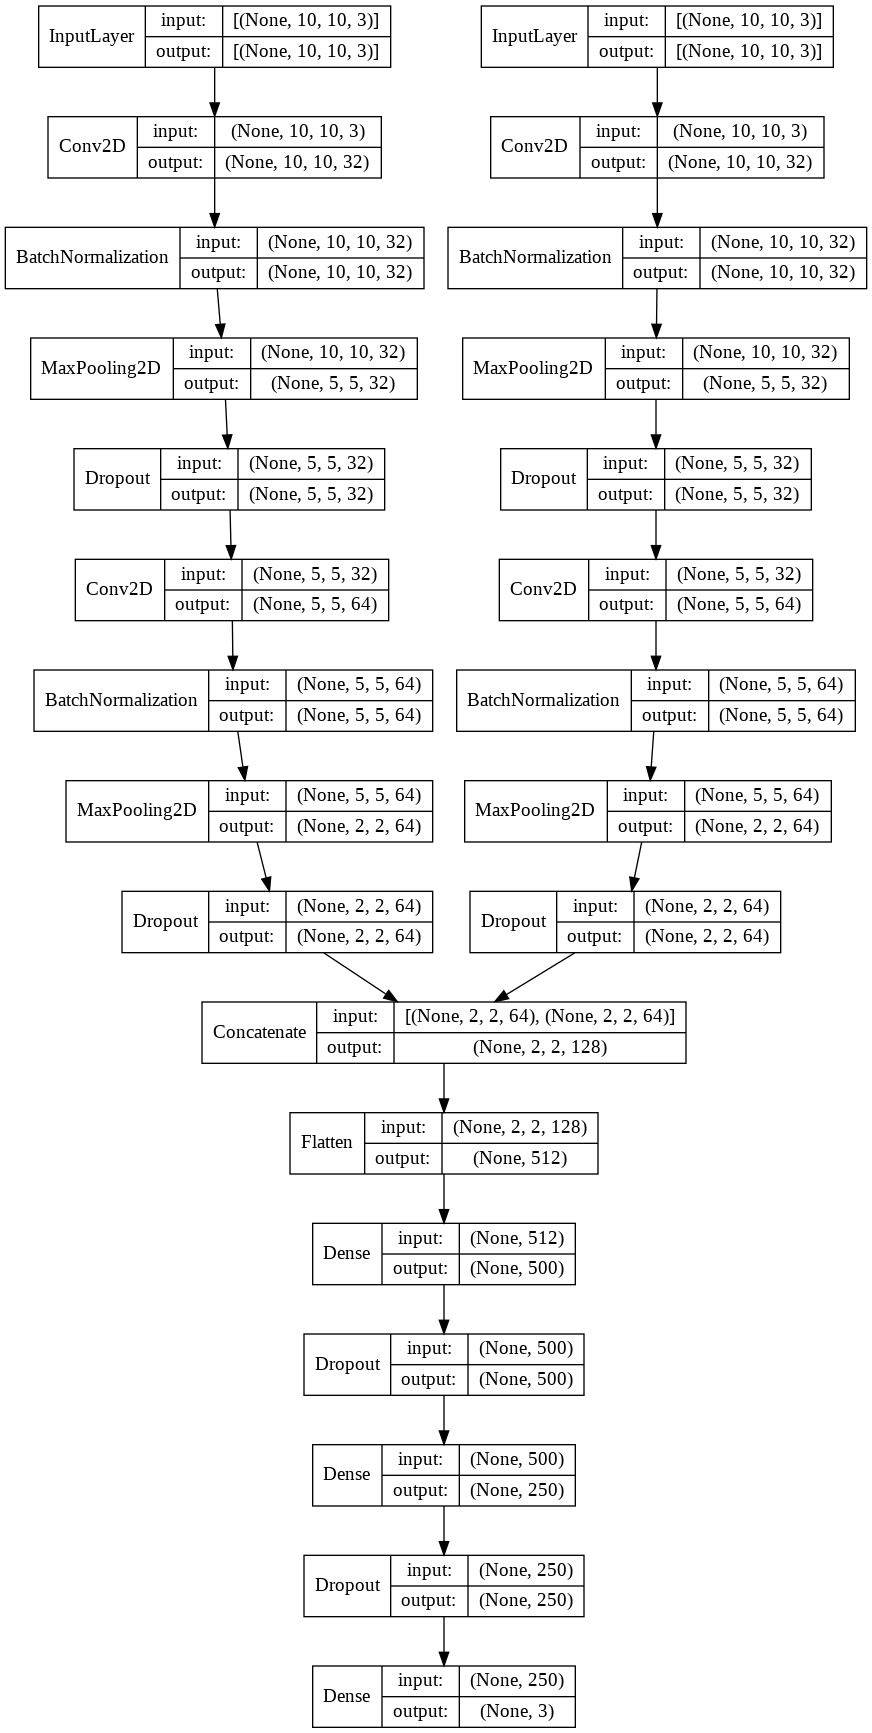

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
model.compile(loss=mae, optimizer="adam", metrics=['mae'])

NameError: ignored

##Обучение модели нейросети

In [ ]:
modelCheckpoint = ModelCheckpoint("model.h5",
                                  monitor='val_mae',
                                  verbose=2,
                                  save_best_only=True)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor = 0.2, patience=2, min_lr=0.00001)

In [ ]:
callbacks = [modelCheckpoint, reduce_lr]

In [ ]:
history = model.fit(datagen.flow([train_data[0],train_data[1]],train_output, batch_size=128), epochs=200, validation_data=[[val_data[0],val_data[1]],val_output], verbose=2)

Epoch 1/200
8/8 - 4s - loss: 0.6854 - custom_loss: 0.6854 - val_loss: 0.7008 - val_custom_loss: 0.6977 - 4s/epoch - 505ms/step
Epoch 2/200
8/8 - 1s - loss: 0.6869 - custom_loss: 0.6869 - val_loss: 0.7108 - val_custom_loss: 0.7108 - 857ms/epoch - 107ms/step
Epoch 3/200
8/8 - 1s - loss: 0.6894 - custom_loss: 0.6894 - val_loss: 0.6943 - val_custom_loss: 0.6918 - 879ms/epoch - 110ms/step
Epoch 4/200
8/8 - 1s - loss: 0.6948 - custom_loss: 0.6948 - val_loss: 0.7498 - val_custom_loss: 0.7413 - 877ms/epoch - 110ms/step
Epoch 5/200
8/8 - 1s - loss: 0.6973 - custom_loss: 0.6972 - val_loss: 0.7077 - val_custom_loss: 0.7024 - 877ms/epoch - 110ms/step
Epoch 6/200
8/8 - 1s - loss: 0.7017 - custom_loss: 0.7017 - val_loss: 0.7232 - val_custom_loss: 0.7150 - 859ms/epoch - 107ms/step
Epoch 7/200
8/8 - 1s - loss: 0.6944 - custom_loss: 0.6944 - val_loss: 0.7143 - val_custom_loss: 0.7048 - 896ms/epoch - 112ms/step
Epoch 8/200
8/8 - 1s - loss: 0.6895 - custom_loss: 0.6894 - val_loss: 0.7123 - val_custom_los

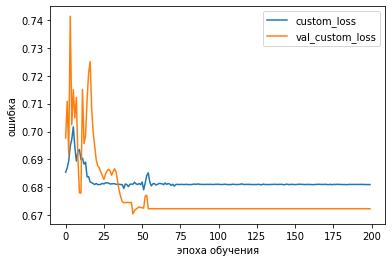

In [ ]:
plt.plot(history.history['custom_loss'],
         label='custom_loss')
plt.plot(history.history['val_custom_loss'],
         label='val_custom_loss')
plt.xlabel('эпоха обучения')
plt.ylabel('ошибка')
plt.legend()
plt.show()

##Тестирование обученной модели

In [ ]:
model.load_weights('model.h5')

In [ ]:
model.evaluate([test_data[0], test_data[1]], test_output, batch_size=128)

In [ ]:
model.save('trained_model_base.h5')

#Полносвязная сеть

###Создание модели нейросети

In [ ]:
train_data, train_output, val_data, val_output, test_data, test_output = train_val_test_split(input_data, output_data, 0.8, 0.2, 0.0)

In [ ]:
train_data = train_data.reshape(2240, -1)
val_data = val_data.reshape(560, -1)

In [ ]:
input = Input(shape = (1200, ))
branch = input
branch = Dense(2000, activation = 'relu')(branch)
branch = Dense(1000, activation = 'relu')(branch)
branch = Dense(500, activation = 'relu')(branch)
branch = Dense(250, activation = 'relu')(branch)
output = Dense(3, activation = 'relu')(branch)

In [ ]:
model = Model(inputs = input, outputs = output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1200)]            0         
                                                                 
 dense_5 (Dense)             (None, 2000)              2402000   
                                                                 
 dense_6 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_7 (Dense)             (None, 500)               500500    
                                                                 
 dense_8 (Dense)             (None, 250)               125250    
                                                                 
 dense_9 (Dense)             (None, 3)                 753       
                                                                 
Total params: 5,029,503
Trainable params: 5,029,503
Non-train

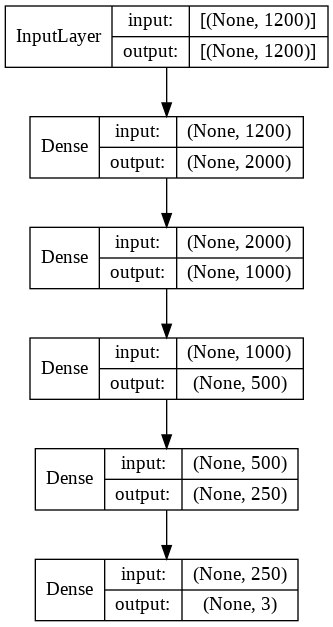

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
import math
def eulers_to_rot_mat(eulers):
    i1 = eulers[:,0]
    i2 = eulers[:,1]
    i3 = eulers[:,2]
    i1c = tf.cos(i1*math.pi/180)
    i1s = tf.sin(i1*math.pi/180)
    i2c = tf.cos(i2*math.pi/180)
    i2s = tf.sin(i2*math.pi/180)
    i3c = tf.cos(i3*math.pi/180)
    i3s = tf.sin(i3*math.pi/180)
    '''
    x00 = i1c * i2c * i3c - i1s * i3s
    x01 = -i3c * i1s - i1c * i2c * i3s
    x02 = i1c * i2s
    x10 = i1c * i3s + i2c * i3c * i1s
    x11 = i1c * i3c - i2c * i1s * i3s
    x12 = i1s * i2s
    x20 = -i3c * i2s
    x21 = i2s * i3s
    x22 = i2c
    '''
    x00 = i1c * i3c - i2c * i3s * i1s
    x10 = -i1c * i3s - i1s * i2c * i3c
    x20 = i1s * i2s
    x01 = i1s * i3c + i2c * i3s * i1c
    x11 = -i1s * i3s + i1c * i2c * i3c
    x21 = -i1c * i2s
    x02 = i3s * i2s
    x12 = i2s * i3c
    x22 = i2c

    c0 = tf.stack((x00, x01, x02), axis=1)
    c1 = tf.stack((x10, x11, x12), axis=1)
    c2 = tf.stack((x20, x21, x22), axis=1)
    rot_mat = tf.stack((c0, c1, c2), axis=1)
    return rot_mat


def rot_mat_to_trace(r1, r2, sym):
    r2sym = tf.linalg.matmul(r1, sym)
    dg = tf.linalg.matmul(r2sym, r2)
    traces = tf.linalg.trace(dg)
    traces = tf.clip_by_value(traces, -1, 3)
    return traces

In [ ]:
SYMMETRIES = tf.Variable([
    [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
    [[0, 0, 1], [1, 0, 0], [0, 1, 0]],
    [[0, 1, 0], [0, 0, 1], [1, 0, 0]],
    [[0, -1, 0], [0, 0, 1], [-1, 0, 0]],
    [[0, -1, 0], [0, 0, -1], [1, 0, 0]],
    [[0, 1, 0], [0, 0, -1], [-1, 0, 0]],
    [[0, 0, -1], [1, 0, 0], [0, -1, 0]],
    [[0, 0, -1], [-1, 0, 0], [0, 1, 0]],
    [[0, 0, 1], [-1, 0, 0], [0, -1, 0]],
    [[-1, 0, 0], [0, 1, 0], [0, 0, -1]],
    [[-1, 0, 0], [0, -1, 0], [0, 0, 1]],
    [[1, 0, 0], [0, -1, 0], [0, 0, -1]],
    [[0, 0, -1], [0, -1, 0], [-1, 0, 0]],
    [[0, 0, 1], [0, -1, 0], [1, 0, 0]],
    [[0, 0, 1], [0, 1, 0], [-1, 0, 0]],
    [[0, 0, -1], [0, 1, 0], [1, 0, 0]],
    [[-1, 0, 0], [0, 0, -1], [0, -1, 0]],
    [[1, 0, 0], [0, 0, -1], [0, 1, 0]],
    [[1, 0, 0], [0, 0, 1], [0, -1, 0]],
    [[-1, 0, 0], [0, 0, 1], [0, 1, 0]],
    [[0, -1, 0], [-1, 0, 0], [0, 0, -1]],
    [[0, 1, 0], [-1, 0, 0], [0, 0, 1]],
    [[0, 1, 0], [1, 0, 0], [0, 0, -1]],
    [[0, -1, 0], [1, 0, 0], [0, 0, 1]],
], dtype=tf.float32)


@tf.function
def custom_loss(y_true, y_pred):
    rot_mat1 = eulers_to_rot_mat(y_true)
    rot_mat2 = eulers_to_rot_mat(y_pred)
    rot_mat_inv2 = tf.linalg.inv(rot_mat2)
    angles = [_angle_function(rot_mat1, rot_mat_inv2, SYMMETRIES[k]) for k in range(24)]
    moa_loss = tf.reduce_min(tf.abs(angles), axis=0)
    moa_loss_metric = tf.reduce_mean(moa_loss)
    return moa_loss_metric


def _angle_function(r1, r2, sym):
    traces = rot_mat_to_trace(r1, r2, sym)
    angle = tf.sqrt(3 - traces)
    return angle

In [ ]:
@tf.function
def moa(y_true, y_pred):
    loss = tf.reduce_mean(misorientation(y_true, y_pred))
    return loss


def misorientation(eulers_set_1, eulers_set_2):
    r1 = eulers_to_rot_mat(eulers_set_1)
    r2 = eulers_to_rot_mat(eulers_set_2)
    r2 = tf.linalg.inv(r2)
    angles = [_angle_function_acos(r1, r2, SYMMETRIES[k]) for k in range(24)]
    min_angles = tf.reduce_min(tf.abs(angles), axis=0)
    return min_angles


def _angle_function_acos(r1, r2, sym):
    traces = rot_mat_to_trace(r1, r2, sym)
    angle = tf.acos((traces - 1) / 2)
    return angle

In [ ]:
model.compile(loss=custom_loss, optimizer="adam", metrics=[moa])

In [ ]:
model.compile(loss='mae', optimizer="adam", metrics=['mae'])

###Обучение модели нейросети

In [ ]:
modelCheckpoint = ModelCheckpoint("model.h5",
                                  monitor='val_mae',
                                  verbose=2,
                                  save_best_only=True)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor = 0.2, patience=2, min_lr=0.00001)

In [ ]:
callbacks = [modelCheckpoint, reduce_lr]

In [ ]:
history = model.fit(train_data,train_output, epochs=200, validation_data=[val_data,val_output], callbacks = callbacks, verbose=2)

Epoch 1/200

Epoch 1: val_mae improved from inf to 1.44217, saving model to model.h5
70/70 - 2s - loss: 1.4197 - mae: 1.4197 - val_loss: 1.4343 - val_mae: 1.4422 - lr: 0.0010 - 2s/epoch - 34ms/step
Epoch 2/200

Epoch 2: val_mae improved from 1.44217 to 1.41294, saving model to model.h5
70/70 - 2s - loss: 1.3964 - mae: 1.3964 - val_loss: 1.4053 - val_mae: 1.4129 - lr: 0.0010 - 2s/epoch - 29ms/step
Epoch 3/200

Epoch 3: val_mae improved from 1.41294 to 1.38969, saving model to model.h5
70/70 - 2s - loss: 1.3785 - mae: 1.3785 - val_loss: 1.3846 - val_mae: 1.3897 - lr: 0.0010 - 2s/epoch - 28ms/step
Epoch 4/200

Epoch 4: val_mae improved from 1.38969 to 1.37260, saving model to model.h5
70/70 - 2s - loss: 1.3671 - mae: 1.3671 - val_loss: 1.3660 - val_mae: 1.3726 - lr: 0.0010 - 2s/epoch - 27ms/step
Epoch 5/200

Epoch 5: val_mae improved from 1.37260 to 1.36811, saving model to model.h5
70/70 - 2s - loss: 1.3635 - mae: 1.3635 - val_loss: 1.3615 - val_mae: 1.3681 - lr: 0.0010 - 2s/epoch - 27ms

In [ ]:
plt.plot(history.history['moa'],
         label='moa')
plt.plot(history.history['val_moa'],
         label='val_moa')
plt.xlabel('эпоха обучения')
plt.ylabel('ошибка')
plt.legend()
plt.show()

KeyError: ignored

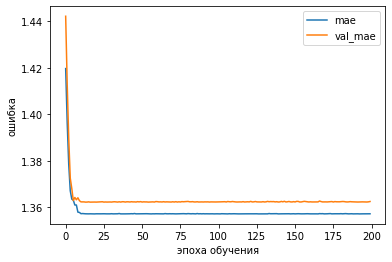

In [ ]:
plt.plot(history.history['mae'],
         label='mae')
plt.plot(history.history['val_mae'],
         label='val_mae')
plt.xlabel('эпоха обучения')
plt.ylabel('ошибка')
plt.legend()
plt.show()

###Тестирование обученной модели

In [ ]:
model.load_weights('model.h5')

In [ ]:
model.evaluate([test_data[0], test_data[1], test_data[2], test_data[3]], test_output, batch_size=128)

3/3 [==============================] - 0s 44ms/step - loss: 50.4196 - mae: 4.6007


[50.4195556640625, 4.6006646156311035]

In [ ]:
new_model = model
new_model.compile('adam', loss=None)
new_model.save('trained_model_dense.h5')

In [ ]:
model.save('trained_model_index_dense.h5')

#Модель с 3мя выходами

###Создание модели нейросети

In [ ]:
first_input = Input(shape = (10, 10, 3))
first_branch = first_input
filters = 64
for i in range(2):
  first_branch = Conv2D(filters = filters, kernel_size = (3, 3), padding = 'same', activation = 'relu')(first_branch)
  first_branch = BatchNormalization()(first_branch)
  first_branch = MaxPooling2D((2,2))(first_branch)
  first_branch = Dropout(0.25)(first_branch)
  filters *= 2

In [ ]:
second_input = Input(shape = (10, 10, 3))
second_branch = second_input
filters = 64
for i in range(2):
  second_branch = Conv2D(filters = filters, kernel_size = (3, 3), padding = 'same', activation = 'relu')(second_branch)
  second_branch = BatchNormalization()(second_branch)
  second_branch = MaxPooling2D((2,2))(second_branch)
  second_branch = Dropout(0.25)(second_branch)
  filters *= 2

In [ ]:
third_input = Input(shape = (10, 10, 3))
third_branch = third_input
filters = 64
for i in range(2):
  third_branch = Conv2D(filters = filters, kernel_size = (3, 3), padding = 'same', activation = 'relu')(third_branch)
  third_branch = BatchNormalization()(third_branch)
  third_branch = MaxPooling2D((2,2))(third_branch)
  third_branch = Dropout(0.25)(third_branch)
  filters *= 2

In [ ]:
fourth_input = Input(shape = (10, 10, 3))
fourth_branch = fourth_input
filters = 64
for i in range(2):
  fourth_branch = Conv2D(filters = filters, kernel_size = (3, 3), padding = 'same', activation = 'relu')(fourth_branch)
  fourth_branch = BatchNormalization()(fourth_branch)
  fourth_branch = MaxPooling2D((2,2))(fourth_branch)
  fourth_branch = Dropout(0.25)(fourth_branch)
  filters *= 2

In [ ]:
concatenated_branch = concatenate([first_branch, second_branch, third_branch, fourth_branch])
concatenated_branch = Flatten()(concatenated_branch)
concatenated_branch = Dense(1000, activation = 'relu')(concatenated_branch)
concatenated_branch = Dropout(0.5)(concatenated_branch)
concatenated_branch = Dense(500, activation = 'relu')(concatenated_branch)
concatenated_branch = Dropout(0.5)(concatenated_branch)

first_branch = Dense(200, activation = 'relu')(concatenated_branch)
first_branch = Dropout(0.5)(first_branch)
first_output = Dense(1, activation = 'linear')(first_branch)

second_branch = Dense(200, activation = 'relu')(concatenated_branch)
second_branch = Dropout(0.5)(second_branch)
second_output = Dense(1, activation = 'linear')(second_branch)

third_branch = Dense(200, activation = 'relu')(concatenated_branch)
third_branch = Dropout(0.5)(third_branch)
third_output = Dense(1, activation = 'linear')(third_branch)

In [ ]:
inputs = [first_input, second_input, third_input, fourth_input]
outputs = [first_output, second_output, third_output]
model = Model(inputs = inputs, outputs = outputs)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 10, 10, 3)]  0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 10, 10, 3)]  0           []                               
                                                                                                  
 input_15 (InputLayer)          [(None, 10, 10, 3)]  0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 10, 10, 3)]  0           []                               
                                                                                            

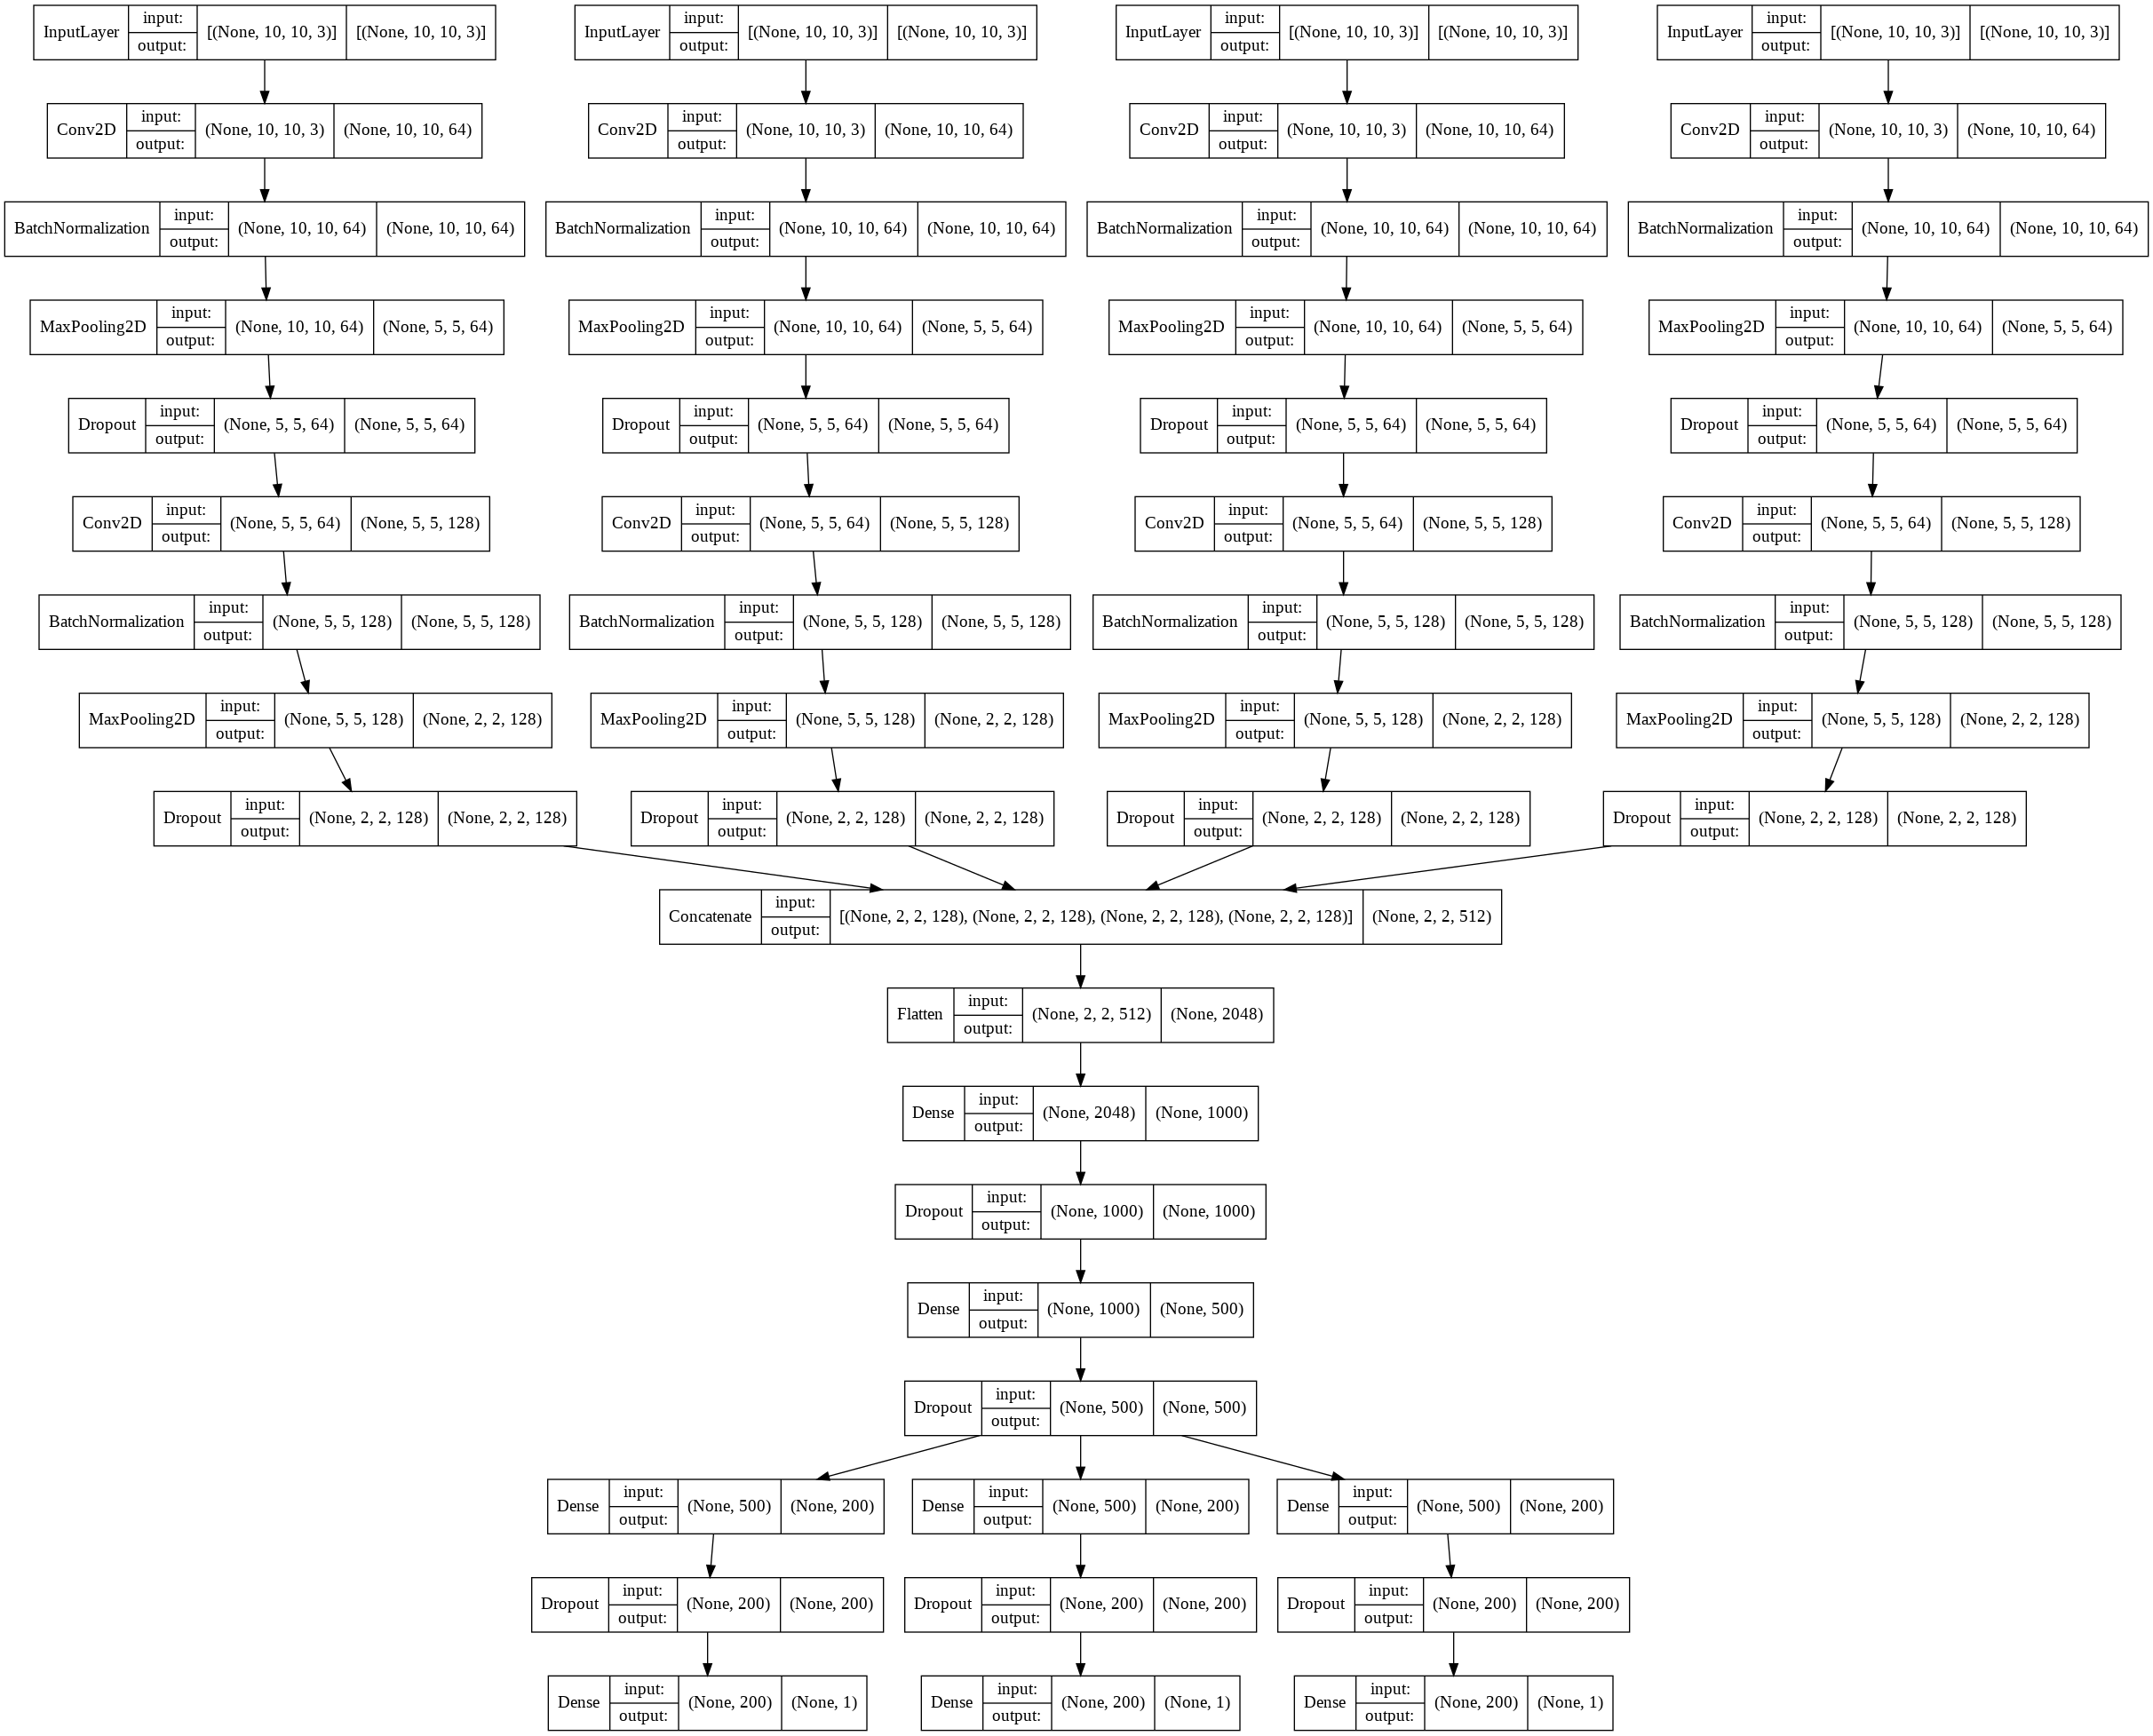

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
loss_1 = MeanAbsoluteError()
loss_2 = MeanAbsoluteError()
loss_3 = MeanAbsoluteError()
losses = {
    'dense_30':loss_1,
    'dense_32':loss_2,
    'dense_34':loss_3,
}

In [ ]:
model.compile(loss=losses, optimizer="adam", metrics=["mae"])

###Обучение модели нейросети

In [ ]:
modelCheckpoint = ModelCheckpoint("model.h5",
                                  monitor='val_mae',
                                  verbose=2,
                                  save_best_only=True)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor = 0.2, patience=2, min_lr=0.00001)

In [ ]:
callbacks = [modelCheckpoint, reduce_lr]

In [ ]:
history = model.fit([train_data[0], train_data[1], train_data[2], train_data[3]],[train_output,train_output,train_output], callbacks=callbacks, epochs=100, validation_data=[[val_data[0], val_data[1], val_data[2], val_data[3]],[val_output,val_output,val_output]], verbose=2)

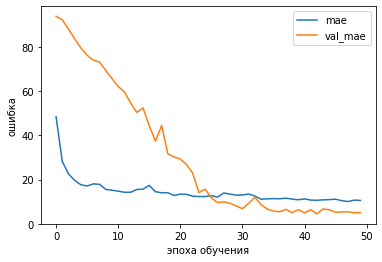

In [ ]:
plt.plot(history.history['mae'],
         label='mae')
plt.plot(history.history['val_mae'],
         label='val_mae')
plt.xlabel('эпоха обучения')
plt.ylabel('ошибка')
plt.legend()
plt.show()

###Тестирование обученной модели

In [ ]:
model.load_weights('model.h5')

In [ ]:
model.evaluate([test_data[0], test_data[1], test_data[2], test_data[3]], test_output, batch_size=128)

3/3 [==============================] - 0s 44ms/step - loss: 50.4196 - mae: 4.6007


[50.4195556640625, 4.6006646156311035]

In [ ]:
model.save('trained_model_v2.h5')